In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from sympy.physics.mechanics import dynamicsymbols, init_vprinting, msubs

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

init_printing()
init_vprinting()

m_c = Symbol('m_c')
m_p = Symbol('m_p')

x1, x2, x1_dot, x2_dot, theta1, theta2, theta1_dot, theta2_dot = symbols('x1 x2 xdot1 xdot2 theta1 theta2 thetadot1 thetadot2', cls=Function)

g = Symbol('g')
l = Symbol('l')
t = Symbol('t')
f = Symbol('f')


eom_1 = Eq((m_p + m_c) * x2_dot(t) + m_p * l * cos(theta1(t)) - m_p * l * theta2_dot(t)**2 * sin(theta1(t)), f)
eom_2 = Eq(m_p * l * x2_dot(t) * cos(theta1(t)) + m_p * l**2 * theta2_dot(t) + m_p * g * l * sin(theta1(t)), 0)

In [3]:
eom_1

In [4]:
eom_2

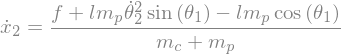

In [5]:
eom_1_x2_dot = dsolve(eom_1, x2_dot(t))
eom_1_x2_dot

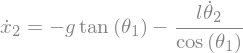

In [6]:
eom_2_x2_dot = dsolve(eom_2, x2_dot(t))
eom_2_x2_dot

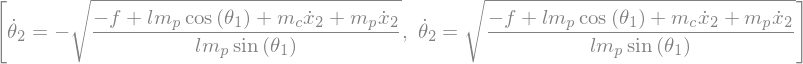

In [7]:
eom_1_theta2_dot = dsolve(eom_1, theta2_dot(t))
eom_1_theta2_dot

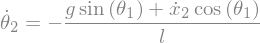

In [8]:
eom_2_theta2_dot = dsolve(eom_2, theta2_dot(t))
eom_2_theta2_dot

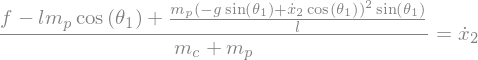

In [9]:
x2_dot_eom_1_subs = Eq((f + l * m_p * ((-g * sin(theta1(t)) + x2_dot(t)*cos(theta1(t))) / l)**2 * sin(theta1(t)) - l * m_p * cos(theta1(t)))/(m_c + m_p), x2_dot(t))
x2_dot_eom_1_subs

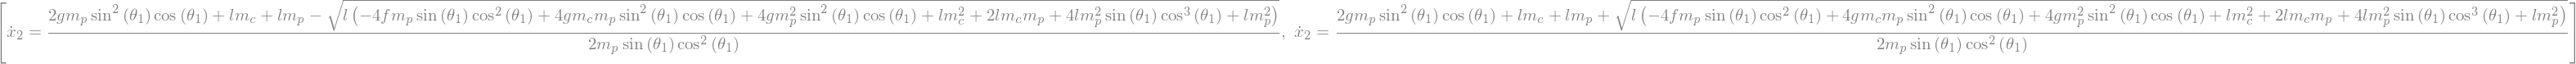

In [10]:
x2_dot_eom_1_subs_solved = dsolve(x2_dot_eom_1_subs, x2_dot(t))
x2_dot_eom_1_subs_solved

In [11]:
eom_1_x2_dot = dsolve(eom_1, x2_dot(t))
eom_1_theta2_dot = dsolve(eom_1, theta2_dot(t))
eom_2_x2_dot = dsolve(eom_2, x2_dot(t))
eom_2_theta2_dot = dsolve(eom_2, theta2_dot(t))

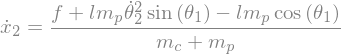

In [12]:
eom_1_x2_dot

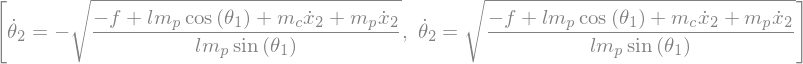

In [13]:
eom_1_theta2_dot

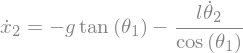

In [14]:
eom_2_x2_dot

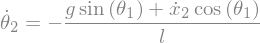

In [15]:
eom_2_theta2_dot

In [16]:
x_dot_dot, theta, theta_dot, theta_dot_dot = symbols('xdotdot theta thetadot thetadotdot', cls=Function)
eom_direct_1 = Eq((m_p + m_c) * x_dot_dot(t) + m_p * l * cos(theta(t)) * theta_dot_dot(t) - m_p * l * theta_dot(t)**2 * sin(theta(t)), f)
eom_direct_2 = Eq(m_p * l * x_dot_dot(t) * cos(theta(t)) + m_p * l**2 * theta_dot_dot(t) + m_p * g * l * sin(theta(t)), 0)

In [17]:
eom_direct_1

In [18]:
eom_direct_2

In [19]:
eq_x2_dot_dot_1 = dsolve(eom_direct_1, x_dot_dot(t))

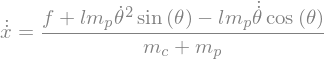

In [20]:
eq_x2_dot_dot_1

In [21]:
eq_x2_dot_dot_2 = dsolve(eom_direct_2, x_dot_dot(t))

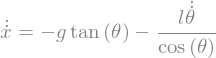

In [22]:
eq_x2_dot_dot_2

In [23]:
eq_theta2_dot_dot_2 = dsolve(eom_direct_2, theta_dot_dot(t))

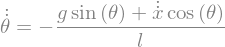

In [24]:
eq_theta2_dot_dot_2

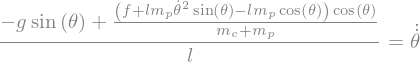

In [25]:
eq_theta_dot_dot = Eq((- g * sin(theta(t)) + ((f + l * m_p * theta_dot(t)**2 * sin(theta(t)) - l * m_p * cos(theta(t))) / (m_c + m_p)) * cos(theta(t))) / l, theta_dot_dot(t))
eq_theta_dot_dot

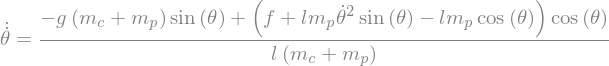

In [26]:
simplify(eq_theta_dot_dot)

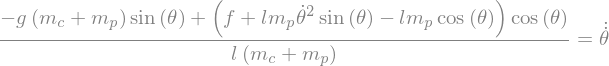

In [27]:
test = Eq((-g * (m_c + m_p) * sin(theta(t)) + (f + l * m_p * theta_dot(t)**2 * sin(theta(t)) - l * m_p * cos(theta(t))) * cos(theta(t))) / (l * (m_c + m_p)), theta_dot_dot(t))
test

Both here are the same, applying the following trig identity: sin(2 * a) / 2 = sin(a) * cos(a)


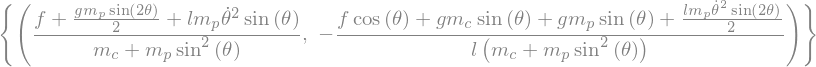

In [28]:
x_dot_dot, theta, theta_dot, theta_dot_dot = symbols('xdotdot theta thetadot thetadotdot', real=True)
print("Both here are the same, applying the following trig identity: sin(2 * a) / 2 = sin(a) * cos(a)")
nonlinsolve([(m_c + m_p) * x_dot_dot + m_p * l * theta_dot_dot * cos(theta) - m_p * l * theta_dot**2 * sin(theta) - f, m_p * l * cos(theta) * x_dot_dot + m_p * l**2 * theta_dot_dot + m_p  * g * l * sin(theta)], [x_dot_dot, theta_dot_dot])

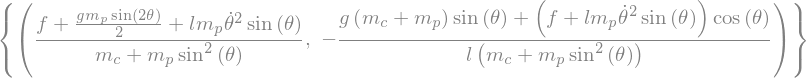

In [29]:
linsolve([(m_c + m_p) * x_dot_dot + m_p * l * theta_dot_dot * cos(theta) - m_p * l * theta_dot**2 * sin(theta) - f, m_p * l * cos(theta) * x_dot_dot + m_p * l**2 * theta_dot_dot + m_p  * g * l * sin(theta)], [x_dot_dot, theta_dot_dot])

In [30]:
print('Final equations of motion where m is pole mass and M is cart mass:')
from IPython.display import Image
from IPython.core.display import HTML
Image(url = "https://cdn.discordapp.com/attachments/583293615678423060/659699880385708032/unknown.png")

Final equations of motion where m is pole mass and M is cart mass:


In [31]:
from IPython.display import Image
from IPython.core.display import HTML
print("This is the general form of linearizing the system.")
Image(url = "https://cdn.discordapp.com/attachments/583293615678423060/659739287390126111/unknown.png")

This is the general form of linearizing the system.


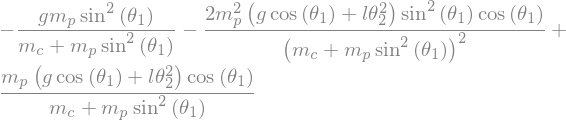

In [32]:
from sympy import *
theta1, theta2 = symbols('theta_1 theta_2')
diff((m_p * sin(theta1) * (g * cos(theta1) + l * theta2**2)) / (m_c + m_p * sin(theta1)**2), theta1)

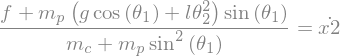

In [33]:
theta1, theta2, x2_dot = symbols('theta_1 theta_2 x2dot')
eq_diff_x2d = Eq((f + m_p * sin(theta1) * (g * cos(theta1) + l * theta2**2)) / (m_c + m_p * sin(theta1)**2), x2_dot)
eq_diff_x2d

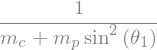

In [34]:
#Df2/Dq3
simplify(diff((f + m_p * sin(theta1) * (g * cos(theta1) + l * theta2**2)) / (m_c + m_p * sin(theta1)**2), f))

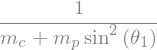

In [35]:
#Df2/Du1
df2_du1 = simplify(diff((f + m_p * sin(theta1) * (g * cos(theta1) + l * theta2**2)) / (m_c + m_p * sin(theta1)**2), f))
df2_du1

In [36]:
df2_du1_subs_1 = df2_du1.subs(sin(theta1), 0)
df2_du1_subs_1

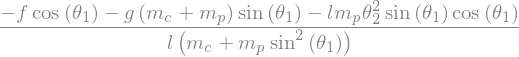

In [37]:
f4 = -(f * cos(theta1) + (m_c + m_p) * g * sin(theta1) + l * m_p * theta2**2 * sin(theta1) * cos(theta1)) / (l * (m_c + m_p * sin(theta1)**2))
f4

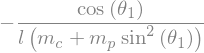

In [38]:
#Df4/Du1
df4_du1 = simplify(diff(f4, f))
df4_du1

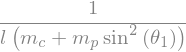

In [39]:
df4_du1_subs_1 = simplify(df4_du1.subs(cos(theta1), -1))
df4_du1_subs_1

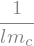

In [40]:
df4_du1_subs_2 = simplify(df4_du1_subs_1.subs(sin(theta1), 0))
df4_du1_subs_2

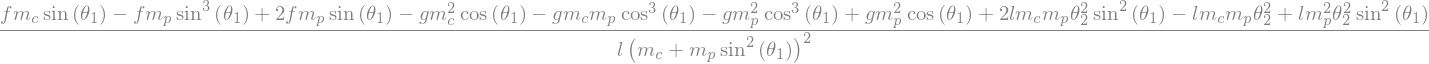

In [41]:
eq_diff_df4_dq3 = simplify(diff(f4, theta1))
eq_diff_df4_dq3

Firstly, we substitute in -1 for every cos(theta1) since we linearize around [x 0 pi 0] and cos(pi) is -1.


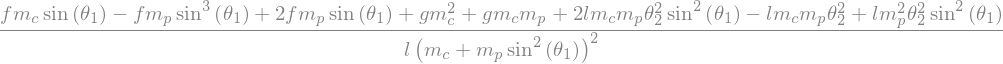

In [42]:
print('Firstly, we substitute in -1 for every cos(theta1) since we linearize around [x 0 pi 0] and cos(pi) is -1.')
eq_temp_simplify_1 = simplify(eq_diff_df4_dq3.subs(cos(theta1), -1))
eq_temp_simplify_1

Then we substitute 0 for every sin(theta1), again due to sin(pi) being 0.


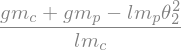

In [43]:
print('Then we substitute 0 for every sin(theta1), again due to sin(pi) being 0.')
eq_temp_simplify_2 = simplify(eq_temp_simplify_1.subs(sin(theta1), 0))
eq_temp_simplify_2

Lastly, the theta_2 terms are also 0 since theta_2 = 0


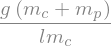

In [44]:
print('Lastly, the theta_2 terms are also 0 since theta_2 = 0')
eq_final_simplify = simplify(eq_temp_simplify_2.subs(theta2, 0))
eq_final_simplify

In [45]:
#LQI Init
A_e = np.array([[0, 1, 0, 0, 0, 0, 0],
              [0, 0, (g * m_pole) / m_cart, 0, 0, 0, 0],
              [0, 0, 0, 1, 0, 0, 0],
              [0, 0, (g * (m_pole + m_cart)) / (l * m_cart), 0, 0, 0, 0],
              [-1, 0, 0, 0, 0, 0, 0],
              [0, -1, 0, 0, 0, 0, 0],
              [0, 0, -1, 0, 0, 0, 0]])

B_e = np.array([[0],
              [1/m_cart],
              [0],
              [1/(l * m_cart)],
              [0],
              [0],
              [0]])

C = np.array([[1, 0, 0, 0],
              [0, 1, 0, 0],
              [0, 0, 1, 0]])

Q_e = np.array([[1, 0, 0, 0, 0, 0, 0],
                [0, 10, 0, 0, 0, 0, 0],
                [0, 0, 100, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 10, 0],
                [0, 0, 0, 0, 0, 0, 10]])

R_e = np.matrix('0.001')

print("Q_e:\n", Q_e)
print("------------------------------------------------------------------")
print("R_e:\n", R_e)

print("A_e:\n", A_e)
print("------------------------------------------------------------------")
print("B_e:\n", B_e)

ctrb_matrix = np.array([B_e, np.matmul(A_e,B_e), np.matmul(A_e**2, B_e), np.matmul(A_e**3, B_e), np.matmul(A_e**4, B_e), np.matmul(A_e**5, B_e), np.matmul(A_e**6, B_e), np.matmul(A_e**7, B_e)])

print("Rank of extended system is:", get_rank(ctrb_matrix))

X_e = scipy.linalg.solve_continuous_are(A_e, B_e, Q_e, R_e)
K_e = np.matmul(np.matmul(scipy.linalg.inv(R_e), B_e.T), X_e)

print('\nK_e:\n', K_e)

x_e0 = [-0.3, 0.13, 2.9, 1.2, 0]

r_t = dict()

x_ref = 5
xd_ref = 0
theta_ref = 0
thetad_ref = 0

for t in np.arange(0, test_length, test_dt):
    if t > test_length * 0.5:
        value = x_ref * 0.25
    else:
        value = x_ref
    r_t[round(t, 1)] = np.array([value])
    

NameError: name 'm_pole' is not defined

In [47]:
from scipy import integrate
x_i_error = 0.0

def traj_func(t, x_e):
    return np.matmul(A_e - np.matmul(B_e, K_e), x_e) + np.array([0, 0, 0, 0, 1]) * r_t[round(t, 0)]

traj_solution = scipy.integrate.solve_ivp(traj_func, timespan, x_e0, t_eval=test_t_eval)
plot_solution(traj_solution)

print("REMEMBER TO CALCULATE THE K MATRIX IF ANY MATRIX ADJUSTMENTS WERE MADE!\n")
print(len(traj_solution.t), "Data points were calculated.")
print('----------------------------------------------------------')
print("Final x:", traj_solution.y[0][-1])
print("Final x_dot:", traj_solution.y[1][-1])
print("Final theta:", traj_solution.y[2][-1])
print("Final theta dot:", traj_solution.y[3][-1])

#export_json_data(traj_solution, "trajectory_test1")

NameError: name 'timespan' is not defined

In [ ]:
import scipy.integrate
from scipy.special import gamma, airy
import math

#This section attempts to simulate LQI

#THESE HAVE TO BE IN NONLINEAR COORDINATES
x_e0 =  [-0.2, 0.2, 2.9, -0.1]
linearization_array_e = np.array([0, 0, math.pi, 0, 0, 0, 0])

print("This is K_e:\n", K_e)

forces_lqi = []

x_i_error_1 = 0.0
x_i_error_2 = 0.0
x_i_error_3 = 0.0
prev_t = 0.0

for i in np.arange(0, test_length, test_dt):
    r_t[round(t, 1)] = np.array([0, 0, 0.1])
    
C = np.array([[1, 0, 0, 0],
              [0, 1, 0, 0],
              [0, 0, 1, 0]])

def func_nonlinear_lqi(t, x):
    global x_i_error_1
    global x_i_error_2
    global x_i_error_3
    global prev_t
    
    error_vector = (-np.matmul(C, x) + r_t[round(t, 1)]) * (t - prev_t)
    
    x_i_error_1 += error_vector[0]
    x_i_error_2 += error_vector[1]
    x_i_error_3 += error_vector[2]
    
    prev_t = t
    
    x_e = np.array([x[0], x[1], x[2], x[3], x_i_error_1, x_i_error_2, x_i_error_3])
    
    f = -np.matmul(K_e, np.subtract(np.array(x_e), linearization_array_e))
    
    forces_lqi.append(f)
    
    return [x[1],
            (f + m_pole * math.sin(x[2]) * (l * x[3]**2 + g * math.cos(x[2]))) / (m_cart + m_pole * sin(x[2])**2),
            x[3],
            (-f * math.cos(x[2]) - m_pole * l * x[3]**2 * math.cos(x[2]) * math.sin(x[2]) - (m_cart + m_pole) * g * math.sin(x[2])) / (l * (m_cart + m_pole * sin(x[2])**2))]

print("Solving...")
solution_nonlinear_lqi = scipy.integrate.solve_ivp(func_nonlinear_lqi, timespan, x_e0, t_eval=test_t_eval)
#solution_nonlinear_lqi = scipy.integrate.solve_ivp(func_nonlinear_lqi, timespan, x_e0)
print(len(solution_nonlinear_lqi.t))
plot_solution(solution_nonlinear_lqi)

In [82]:
import numpy as np

g = 9.81
m_pole = 1
m_cart = 2
l = 0.51

A = np.array([[0, 1, 0, 0],
              [0, 0, (g * m_pole) / m_cart, 0],
              [0, 0, 0, 1],
              [0, 0, (g * (m_pole + m_cart)) / (l * m_cart), 0]])

B = np.array([[0],
              [1/m_cart],
              [0],
              [1/(l * m_cart)]])

print('A:\n', A)
print('--------------------------------------')
print('B:\n', B)

curly_C = np.array([B, np.matmul(A,B), np.matmul(A**2, B), np.matmul(A**3, B)])
#print("Rank of R is", np.linalg.matrix_rank(R))
u, s, v = np.linalg.svd(curly_C)
rank = np.sum(s > 1e-10)
print("\nRank of R is", rank)
eigenvalues, eigenvectors = np.linalg.eig(A)
print("--------------------------------")
print("Eigenvalues:\n", eigenvalues)
curly_C

A:
 [[ 0.          1.          0.          0.        ]
 [ 0.          0.          4.905       0.        ]
 [ 0.          0.          0.          1.        ]
 [ 0.          0.         28.85294118  0.        ]]
--------------------------------------
B:
 [[0.        ]
 [0.5       ]
 [0.        ]
 [0.98039216]]

Rank of R is 4
--------------------------------
Eigenvalues:
 [ 0.          0.          5.37149338 -5.37149338]


array([[[0.        ],
        [0.5       ],
        [0.        ],
        [0.98039216]],

       [[0.5       ],
        [0.        ],
        [0.98039216],
        [0.        ]],

       [[0.5       ],
        [0.        ],
        [0.98039216],
        [0.        ]],

       [[0.5       ],
        [0.        ],
        [0.98039216],
        [0.        ]]])

In [83]:
def get_rank(matrix):
    u, s, v = np.linalg.svd(matrix)
    return np.sum(s > 1e-10)

In [50]:
def calc_x(A, t, n, exponent):
    x_t = np.identity(n)
    for i in range(1, exponent):
        x_t = x_t + (A**i * t**i) / math.factorial(i)
        
    return x_t

In [51]:
def calc_A_t(x):
    #x[0] = x
    #x[1] = x_dot
    #x[2] = theta
    #x[3] = theta_dot
    A_t = np.array([[0, 1, 0, 0],
              [0, 0, (m_pole * (g * m_cart * math.cos(2 * x[2]) + 0.5 * g * m_pole * math.cos(2 * x[2]) - 0.5 * g * m_pole + l * m_cart * x[3]**2 * math.cos(x[2]) - 0.25 * l * m_pole * x[3]**2 * math.cos(x[2]) + 0.25 * l * m_pole * x[3]**2 * math.cos(3 * x[2]))) / (m_cart + m_pole * math.sin(x[2])**2)**2, 0],
              [0, 0, 0, 1],
              [0, 0, (g * m_cart**2 * math.cos(x[2]) - g * m_cart * m_pole * math.cos(x[2])**3 - g * m_pole**2 * math.cos(x[2])**3 + g * m_pole**2 * math.cos(x[2]) + 2 * l * m_cart * m_pole * x[3]**2 * math.sin(x[2])**2 - l * m_cart * m_pole * x[3]**2 + l * m_pole**2 * x[3]**2 * math.sin(x[2])**2) / (l * (m_cart + m_pole * math.sin(x[2])**2)**2), 0]])
    
    return A_t

In [52]:
def calc_B_t(x):
    #x[0] = x
    #x[1] = x_dot
    #x[2] = theta
    #x[3] = theta_dot
    B_t = np.array([[0],
              [1/(m_cart + m_pole * math.sin(x[2])**2)],
              [0],
              [-math.cos(x[2]) / (l * (m_cart + m_pole * math.sin(x[2])**2))]])
    return B_t

In [53]:
import scipy.linalg

def calc_K_t(A, B, Q, R):
    
    X_t = scipy.linalg.solve_continuous_are(A, B, Q, R)
    K_t = np.matmul(np.matmul(scipy.linalg.inv(R), B.T), X)
    return K

In [54]:
def plot_states(t, x):

    ax1 = plt.subplot(2,2,1)
    ax2 = plt.subplot(2,2,2)
    ax3 = plt.subplot(2,2,3)
    ax4 = plt.subplot(2,2,4)

    ax1.plot(t, x[0])
    #plt.ylabel("x (Pos in m)")

    ax2.plot(t, x[1])
    #plt.ylabel("x_dot (Vel in m/s)")

    ax3.plot(t, x[2])
    #plt.ylabel("theta (Angle in rad)")

    ax4.plot(t, x[3])
    #plt.ylabel("Theta_dot (Angular vel in rad/s)")

In [55]:
def plot_solution(solution):

    ax1 = plt.subplot(2,2,1)
    ax2 = plt.subplot(2,2,2)
    ax3 = plt.subplot(2,2,3)
    ax4 = plt.subplot(2,2,4)

    ax1.plot(solution.t, solution.y[0])
    #plt.ylabel("x (Pos in m)")

    ax2.plot(solution.t, solution.y[1])
    #plt.ylabel("x_dot (Vel in m/s)")

    ax3.plot(solution.t, solution.y[2])
    #plt.ylabel("theta (Angle in rad)")

    ax4.plot(solution.t, solution.y[3])
    #plt.ylabel("Theta_dot (Angular vel in rad/s)")

In [56]:
def subtract_lists(x1, x2):
    x = []
    for i in range(len(x1)):
        x.append(x1[i]-x2[i])
        
    return x

In [57]:
#Serializing for visualization

import json
def export_json_data(solution, file_name):
    data = dict()

    for i in range(len(solution.t)):
        data[i] = [solution.y[0][i], 
                   solution.y[1][i], 
                   solution.y[2][i], 
                   solution.y[3][i]]

    with open("{0}.json".format(file_name), 'w') as outfile:
        json.dump(data, outfile)

In [58]:
dt = 0.001
length = 80

In [59]:
import math
from tqdm import tqdm
import matplotlib.pyplot as plt
#x(t) = e^(A*t) where e^(A*t) = I + A * t + (A^2+t^2)/2! + (A^3 + t^3)/3!

x_t = []

#IMPORTANT: afer linearizing around a point, this point is the new 0!
x0 = np.array([[0.3],
               [0.13],
               [math.pi],
               [3.2]])

for i in tqdm(range(0, int(length * (1/dt)))):
    t = i * dt
    x_t.append(np.matmul(calc_x(A, t, 4, 30), x0))

100%|██████████| 80000/80000 [00:10<00:00, 7358.20it/s]


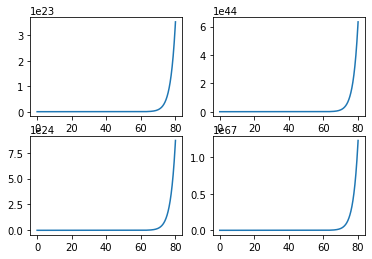

In [60]:
x = []
xd = []
theta = []
thetad = []

for i in range(len(x_t)):
    x.append(x_t[i][0])
    xd.append(x_t[i][1])
    theta.append(x_t[i][2])
    thetad.append(x_t[i][3])


plot_states(np.arange(0, length, dt), [x, xd, theta, thetad])

100%|██████████| 80000/80000 [00:01<00:00, 49671.05it/s]


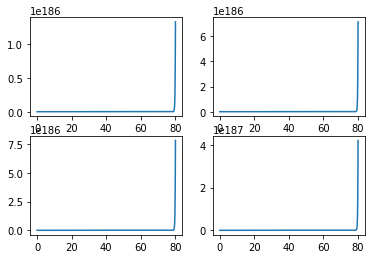

In [61]:
#Basically implementing: https://www.youtube.com/watch?v=nyqJJdhReiA&list=PLMrJAkhIeNNR20Mz-VpzgfQs5zrYi085m&index=2

T = eigenvectors
D = np.array([[eigenvalues[0], 0, 0, 0],
              [0, eigenvalues[1], 0, 0],
              [0, 0, eigenvalues[2], 0],
              [0, 0, 0, eigenvalues[3]]])

x_t = []

for t in tqdm(np.arange(0, length, dt)):
    e_Dt = np.array([[math.e**(eigenvalues[0] * t), 0, 0, 0],
                 [0, math.e**(eigenvalues[1] * t), 0, 0],
                 [0, 0, math.e**(eigenvalues[2] * t), 0],
                 [0, 0, 0, math.e**(eigenvalues[3] * t)]])
    e_At = np.matmul(np.matmul(T, e_Dt), np.linalg.inv(T))
    x_t.append(np.matmul(e_At, x0))

x = []
xd = []
theta = []
thetad = []

for i in range(len(x_t)):
    x.append(x_t[i][0])
    xd.append(x_t[i][1])
    theta.append(x_t[i][2])
    thetad.append(x_t[i][3])

plot_states(np.arange(0, length, dt), [x, xd, theta, thetad])

In [62]:
Q = np.matrix('2 0 0 0; 0 .1 0 0; 0 0 4 0; 0 0 0 .1')
R = np.matrix('0.001')
print("Q:\n", Q)
print("-----------------")
print("R:\n", R)

Q:
 [[2.  0.  0.  0. ]
 [0.  0.1 0.  0. ]
 [0.  0.  4.  0. ]
 [0.  0.  0.  0.1]]
-----------------
R:
 [[0.001]]


In [63]:
test_length = 20
test_dt = 0.001

timespan = [0, test_length]
test_t_eval = np.arange(0, test_length, test_dt)
print(len(test_t_eval))

20000


In [64]:
print(A.shape)
print(Q.shape)
print(B.shape)
print(R.shape)

(4, 4)
(4, 4)
(4, 1)
(1, 1)


K:

[[-44.72135955 -41.34339718 205.93405228  43.43658361]]
--------------------------------------------------------------------
A-BK eigenvalues:
 [-11.60869038+0.j          -6.31500906+0.j
  -1.99474393+1.37409571j  -1.99474393-1.37409571j]


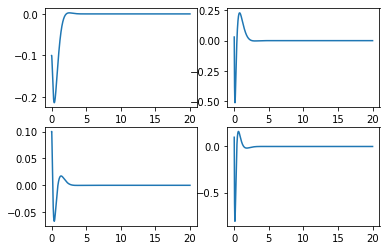

In [65]:
import scipy.integrate
from scipy.special import gamma, airy
import scipy.linalg

#This section calculates the optimal K matrix to drive the system to the linearization point.

X = scipy.linalg.solve_continuous_are(A, B, Q, R)
K = np.matmul(np.matmul(scipy.linalg.inv(R), B.T), X)
print('K:\n')
print(K)
x0 = [-0.1, 0.03, 0.1, 0.1]

def func(t, x):
    return np.matmul(A-np.matmul(B,K), x)

solution = scipy.integrate.solve_ivp(func, timespan, x0, t_eval=test_t_eval)
plot_solution(solution)
#print(A-np.matmul(B,K))
eigenvalues, eigenvectors = np.linalg.eig(A-np.matmul(B, K))
print("--------------------------------------------------------------------")
print("A-BK eigenvalues:\n", eigenvalues)

kalman_solution = solution

20000 Data points were calculated.


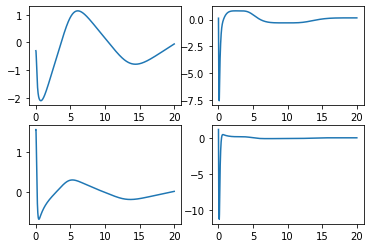

In [66]:
#Linearizing around current position/changing point

import scipy.integrate
from scipy.special import gamma, airy
import math

x0 = [-0.3, 0.13, math.pi / 2, 1.2]

K_theta_map = dict()

def func(t, x):
    A_t = calc_A_t(x)
    K_t = calc_K_t(A, B, Q, R)
    B_t = calc_B_t(x)
    K_theta_map[x[2]] = K_t
    
    return np.matmul(A_t-np.matmul(B,K_t), x)

solution = scipy.integrate.solve_ivp(func, timespan, x0, t_eval=test_t_eval)
plot_solution(solution)
print(len(solution.t), "Data points were calculated.")
#export_json_data(solution, "data_zero")

In [67]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url = "https://cdn.discordapp.com/attachments/273117638308134912/661514994076090370/unknown.png")

This is K rn:
 [[-44.72135955 -41.34339718 205.93405228  43.43658361]]
Solving...
20000


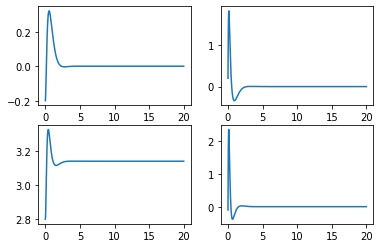

In [68]:
import scipy.integrate
from scipy.special import gamma, airy
import math

#THESE HAVE TO BE IN NONLINEAR COORDINATES, so close to pi
x0 =  [-0.2, 0.2, 2.8, -0.1]
linearization_array = np.array([0, 0, math.pi, 0])

print("This is K rn:\n", K)

forces = []

def func_nonlinear(t, x):
    f = -np.matmul(K, np.subtract(np.array(x), linearization_array))
    forces.append(f)
    return [x[1],
            (f + m_pole * math.sin(x[2]) * (l * x[3]**2 + g * math.cos(x[2]))) / (m_cart + m_pole * math.sin(x[2])**2),
            x[3],
            (-f * math.cos(x[2]) - m_pole * l * x[3]**2 * math.cos(x[2]) * math.sin(x[2]) - (m_cart + m_pole) * g * math.sin(x[2])) / (l * (m_cart + m_pole * math.sin(x[2])**2))]

print("Solving...")
solution_nonlinear = scipy.integrate.solve_ivp(func_nonlinear, timespan, x0, t_eval=test_t_eval)
#solution_nonlinear = scipy.integrate.solve_iqvp(func_nonlinear, timespan, x0)
print(len(solution_nonlinear.t))
plot_solution(solution_nonlinear)
#export_json_data(solution_nonlinear, "nonlinear_test.json")

[74.01362527]


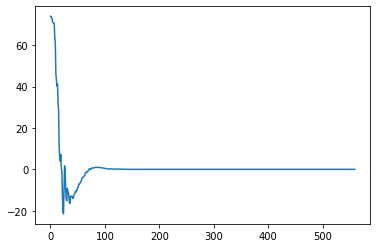

In [69]:
plt.plot(range(len(forces)), forces)
print(max(forces))

In [70]:
test = np.array(x0)
print(test)

[-0.2  0.2  2.8 -0.1]


In [81]:
#Kalman filter section

#https://medium.com/@jaems33/understanding-kalman-filters-with-python-2310e87b8f48
#https://youtu.be/MZJMi-6_4UU?list=PLMrJAkhIeNNR20Mz-VpzgfQs5zrYi085m
#https://youtu.be/-cD7WkbAIL0?list=PLX2gX-ftPVXU3oUFNATxGXY90AULiqnWT

C = np.array([1, 0, 0, 0])
C_T = np.array([[1],
                [0],
                [0],
                [0]])

curly_O = np.array([[C],
                    [np.matmul(C, A)],
                    [np.matmul(C, A**2)],
                    [np.matmul(C, A**3)]])

print("Rank of observability matrix:", get_rank(curly_O))

V_d = np.array([[0.1, 0, 0, 0],
                [0, 0.1, 0, 0],
                [0, 0, 0.1, 0],
                [0, 0, 0, 0.1]])
V_n = 1

#V_n = np.eye(4)
#print(A.T.shape)
#print(C_T.shape)
curly_O

# X_kalman = scipy.linalg.solve_continuous_are(A.T, C_T, V_d, V_n)
# K_f = (np.matmul(np.matmul(scipy.linalg.inv(V_n, C_T), X_kalman)).T
# #K = np.matmul(np.matmul(scipy.linalg.inv(R), B.T), X)b

Rank of observability matrix: 4


array([[[1., 0., 0., 0.]],

       [[0., 1., 0., 0.]],

       [[0., 1., 0., 0.]],

       [[0., 1., 0., 0.]]])

In [79]:
curly_O

array([[[1., 0., 0., 0.]],

       [[0., 1., 0., 0.]],

       [[0., 1., 0., 0.]],

       [[0., 1., 0., 0.]]])

In [72]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url = "https://miro.medium.com/max/4365/1*TMZEwugeC5wlHdITbdmQ5A.png")

In [73]:
import numpy as np

A_B = np.array([[A[0][0], A[0][1], A[0][2], A[0][3], B[0][0]],
                  [A[1][0], A[1][1], A[1][2], A[1][3], B[1][0]],
                  [A[2][0], A[2][1], A[2][2], A[2][3], B[2][0]],
                  [A[3][0], A[3][1], A[3][2], A[3][3], B[3][0]],
                  [0, 0, 0, 0, 1]])

eAt_d = calc_x(A_B, t = test_dt, n=5, exponent=60)

A_d = np.array([[eAt_d[0][0], eAt_d[0][1], eAt_d[0][2], eAt_d[0][3]],
                [eAt_d[1][0], eAt_d[1][1], eAt_d[1][2], eAt_d[1][3]],
                [eAt_d[2][0], eAt_d[2][1], eAt_d[2][2], eAt_d[2][3]],
                [eAt_d[3][0], eAt_d[3][1], eAt_d[3][2], eAt_d[3][3]]])

B_d = np.array([[eAt_d[0][4]],
                [eAt_d[1][4]],
                [eAt_d[2][4]],
                [eAt_d[3][4]]])

print("A discrete:\n", A_d)
print("------------------------------------------------")
print("B discrete:\n", B_d, "\n")

x0_kf = np.array([[-0.1],
                  [-0.10],
                  [-0.2],
                  [-0.10]])

x0_actual = np.array([[0.3],
                      [0.13],
                      [0.2],
                      [0.17]])

sigma_x = 0.001
sigma_x_dot = 0.001
sigma_theta = 0.001
sigma_theta_dot = 0.001

P0 = np.array([[sigma_x**2, sigma_x * sigma_x_dot, sigma_x * sigma_theta, sigma_x * sigma_theta_dot],
               [sigma_x_dot * sigma_x, sigma_x_dot**2, sigma_x_dot * sigma_theta, sigma_x_dot * sigma_theta_dot],
               [sigma_theta * sigma_x, sigma_theta * sigma_x_dot, sigma_theta**2, sigma_theta * sigma_theta_dot],
               [sigma_theta_dot * sigma_x, sigma_theta_dot * sigma_x_dot, sigma_theta_dot * sigma_theta, sigma_theta_dot**2]])

K_control = np.array(K).T

print("K for control:\n", K_control)

x_predicted = [x0_kf] # The predicted state vector purely based on model and noise
P_predicted = [P0] # Predicted Covariance matrix before having calculated the gain

Kf = [] # Kalman gains
Kf_numerator = []
Kf_denominator = []

Y = [] # Measurements with added noise

x_actual = [x0_actual]
u_calculated = []

P_updated = [P0] # The updated Covariance after having calculated the gain.
x_updated = [x0_kf] # The full adjusted state factor after including measurements

H = np.array([[1, 0, 0, 0],
              [0, 0, 1, 0]])

#H = np.array([1, 0, 0, 0]).reshape(1,4)

C = H

mean = 0
covariance = 0.0001

R = np.array([[covariance, 0],
              [0, covariance]])

#R = covariance

w = np.random.normal(mean, covariance, int(test_length * (1/test_dt)))

Z = np.random.normal(mean, covariance, int(test_length * (1/test_dt)))

Q = P0

print("Iterating...")

for i in np.arange(test_dt, test_length, test_dt):

    t = int(i * (1/test_dt))
    #print("\nt:", t)
    
    u_t = - np.matmul(K_control.T, x_updated[-1]) # use x_updated[-1] to test KF performance
    #print("u:", u_t)
    
    x_actual_t = A_d.dot(x_actual[-1]) + B_d.dot(u_t) + w[t]
    #print("x_actual_t:", x_actual_t)
    
    Y_t = C.dot(x_actual_t) + Z[t]
    #print("Y_t:", Y_t)
    
    x_p_t = A_d.dot(x_updated[-1]) + B_d.dot(u_t)
    #print("x_predicted_t:", x_p_t)
    
    P_p_t = np.matmul(A_d.dot(P_updated[-1]), A_d.T) + Q
    #print("P_predicted_t:", P_p_t)
    
    Kf_numerator_t = P_p_t.dot(H.T)
    #print("K_numerator:", K_numerator)
    
    Kf_denominator_t = H.dot(P_p_t).dot(H.T) + R
    #print("K_denominator:", K_denominator)
    
    Kf_t = Kf_numerator_t.dot(np.linalg.pinv(Kf_denominator_t))
    #print("Kf_t:", Kf_t)
    
    P_updated_t = (np.identity(4) - Kf_t.dot(H)).dot(P_p_t)
    #print("P_updated_t:", P_updated_t)
    
    x_updated_t = x_p_t + Kf_t.dot(Y_t - H.dot(x_p_t))
    #print("x_updated_t:", x_updated_t)
    
    x_actual.append(x_actual_t)
    u_calculated.append(u_t)
    
    x_predicted.append(x_p_t)
    P_predicted.append(P_p_t)
    
    Kf.append(Kf_t)
    Kf_numerator.append(Kf_numerator_t)
    Kf_denominator.append(Kf_denominator_t)
    
    Y.append(Y_t)
    
    P_updated.append(P_updated_t)
    x_updated.append(x_updated_t)
    
print(len(x_updated))

#print("Max R:", max(R))
#print("Min R:", min(R))
#print("-------------------------------")

print("Max w:", max(w))
print("Min w:", min(w))
print("-------------------------------")

print("Max Z:", max(Z))
print("Min Z:", min(Z))
print("-------------------------------")

A discrete:
 [[1.         0.0010005  0.         0.        ]
 [0.         1.         0.00491705 0.        ]
 [0.         0.         1.         0.0010005 ]
 [0.         0.         0.02927322 1.        ]]
------------------------------------------------
B discrete:
 [[0.        ]
 [0.00050013]
 [0.        ]
 [0.00098087]] 

K for control:
 [[-44.72135955]
 [-41.34339718]
 [205.93405228]
 [ 43.43658361]]
Iterating...
20000
Max w: 0.000375508913634834
Min w: -0.0003560745431807133
-------------------------------
Max Z: 0.00037794224862681703
Min Z: -0.0003967677398195193
-------------------------------


20000


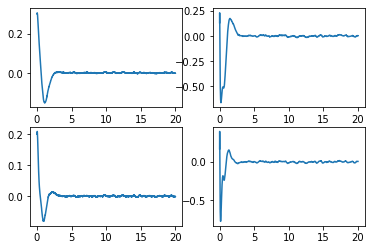

In [74]:
x_actual_plot = []
xd_actual_plot = []
theta_actual_plot = []
thetad_actual_plot = []

for i in x_actual:
    x_actual_plot.append(i[0])
    xd_actual_plot.append(i[1])
    theta_actual_plot.append(i[2])
    thetad_actual_plot.append(i[3])
    
print(len(x_actual_plot))
plot_states(np.arange(0, test_length, test_dt), [x_actual_plot, xd_actual_plot, theta_actual_plot, thetad_actual_plot])

20000


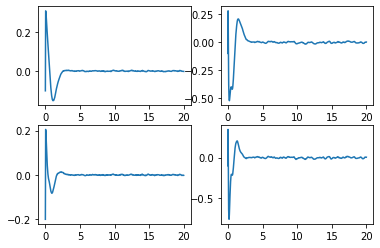

In [75]:
x_updated_plot = []
xd_updated_plot = []
theta_updated_plot = []
thetad_updated_plot = []

for i in x_updated:
    x_updated_plot.append(i[0][0])
    xd_updated_plot.append(i[1][0])
    theta_updated_plot.append(i[2][0])
    thetad_updated_plot.append(i[3][0])
    
print(len(xd_updated_plot))
plot_states(np.arange(0, test_length, test_dt), [x_updated_plot, xd_updated_plot, theta_updated_plot, thetad_updated_plot])

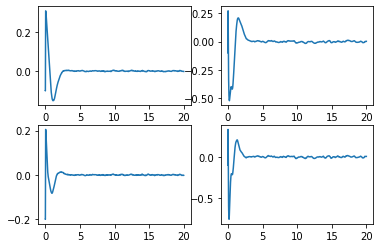

In [76]:
x_predicted_plot = []
xd_predicted_plot = []
theta_predicted_plot = []
thetad_predicted_plot = []

for i in x_predicted:
    x_predicted_plot.append(i[0])
    xd_predicted_plot.append(i[1])
    theta_predicted_plot.append(i[2])
    thetad_predicted_plot.append(i[3])

plot_states(np.arange(0, test_length, test_dt), [x_predicted_plot, xd_predicted_plot, theta_predicted_plot, thetad_predicted_plot])

In [77]:
import csv
import matplotlib.pyplot as plt

gazebo_data = []

with open('/home/loukas/Documents/gazebo_plots/x_errors.csv', 'rt') as x_estimate_file:
    x_estimate_reader = csv.reader(x_estimate_file, delimiter=',', quotechar='|')
    for row in x_estimate_reader:
        #print(row)
        gazebo_data.append([row[0], row[1], row[2], row[3]])
    
print("Loop done")
print("Data length:", len(gazebo_data))
print("Max position error:", max([element[0] for element in gazebo_data]))
print("Max cart velocity error:", max([element[1] for element in gazebo_data]))
print("Max angle error:", max([element[2] for element in gazebo_data]))
print("Max angular velocity error:", max([element[3] for element in gazebo_data]))

#frame = plt.gca()
#frame.axes.get_yaxis().set_visible(False)
#frame.axes.yaxis.set_ticklabels([])
#plt.plot([x[1] for x in x_estimate_gazebo])
#plt.show()

Loop done
Data length: 17461
Max position error: 9.98988e-05
Max cart velocity error: 9.89513e-06
Max angle error: 9.94734e-05
Max angular velocity error: 8.6566e-05


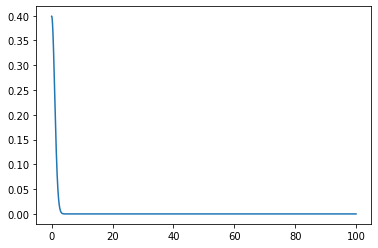

In [78]:
import math

data = []
mu = 0.0
sigma = 1

for i in np.arange(0, 100, 0.0001):
    data.append((1 / math.sqrt(2 * math.pi * sigma**2)) * math.e**(-(i - mu)**2 / (2 * sigma**2)))
    
plt.plot(np.arange(0, 100, 0.0001), data)